<a href="https://colab.research.google.com/github/Jamil-Ray/Jamil/blob/main/CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pn
import numpy as np

data= pn.read_csv("https://raw.githubusercontent.com/swakkhar/MachineLearning/master/dataAll.csv",header=None)


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546
0,0.050435,0.057391,0.059130,0.069565,0.000000,0.034783,0.057391,0.106087,0.013913,0.059130,0.059130,0.046957,0.041739,0.017391,0.048696,0.067826,0.078261,0.017391,0.031304,0.083478,0.325217,0.396522,0.278261,150,118,125,0.003478,0.266087,0.483478,0.758261,0.996522,0.008696,0.250435,0.540870,0.742609,1.000000,0.001739,0.193043,0.460870,0.737391,...,173.29,58.54,35.48,58.30,106.14,7.36,35.90,7.03,92.41,0.30,0.27,0.24,0.22,0.22,0.22,0.23,0.23,0.23,0.23,0.18,0.16,0.14,0.12,0.12,0.12,0.13,0.14,0.14,0.13,0.16,0.15,0.14,0.13,0.13,0.12,0.12,0.12,0.11,0.11,-1
1,0.079681,0.027888,0.067729,0.035857,0.007968,0.047809,0.039841,0.071713,0.007968,0.083665,0.079681,0.107570,0.035857,0.039841,0.035857,0.087649,0.059761,0.003984,0.047809,0.031873,0.326693,0.390438,0.282869,64,49,46,0.007968,0.278884,0.466135,0.665339,1.000000,0.011952,0.235060,0.529880,0.788845,0.996016,0.003984,0.231076,0.501992,0.764940,...,69.91,15.89,21.79,15.78,37.66,3.14,21.99,3.00,61.76,0.28,0.24,0.20,0.17,0.16,0.15,0.15,0.14,0.14,0.14,0.15,0.13,0.11,0.09,0.08,0.07,0.07,0.07,0.07,0.07,0.25,0.23,0.21,0.19,0.18,0.17,0.16,0.15,0.14,0.13,-1
2,0.101124,0.011236,0.056180,0.056180,0.022472,0.044944,0.056180,0.056180,0.000000,0.022472,0.067416,0.089888,0.056180,0.067416,0.011236,0.089888,0.078652,0.022472,0.022472,0.067416,0.314607,0.359551,0.325843,19,22,25,0.022472,0.314607,0.483146,0.696629,1.000000,0.078652,0.258427,0.550562,0.775281,0.921348,0.011236,0.134831,0.449438,0.707865,...,18.90,8.44,7.02,8.55,17.08,1.61,6.54,1.65,18.01,0.21,0.17,0.14,0.12,0.11,0.12,0.13,0.15,0.16,0.17,0.19,0.16,0.13,0.11,0.10,0.10,0.10,0.11,0.11,0.11,0.20,0.19,0.18,0.17,0.16,0.15,0.13,0.12,0.11,0.10,-1
3,0.116456,0.037975,0.075949,0.050633,0.005063,0.073418,0.032911,0.058228,0.010127,0.043038,0.081013,0.027848,0.015190,0.040506,0.048101,0.045570,0.088608,0.007595,0.058228,0.083544,0.298734,0.425316,0.275949,98,70,95,0.007595,0.225316,0.503797,0.782278,0.982278,0.005063,0.283544,0.508861,0.746835,1.000000,0.002532,0.240506,0.486076,0.721519,...,95.54,41.68,32.39,40.56,66.01,19.82,33.83,18.07,46.71,0.24,0.22,0.19,0.18,0.17,0.16,0.16,0.17,0.17,0.17,0.17,0.15,0.13,0.12,0.11,0.10,0.10,0.11,0.11,0.11,0.12,0.11,0.10,0.10,0.09,0.09,0.09,0.08,0.08,0.08,-1
4,0.087218,0.064662,0.037594,0.063158,0.010526,0.028571,0.061654,0.073684,0.021053,0.039098,0.094737,0.055639,0.037594,0.045113,0.054135,0.069173,0.042105,0.018045,0.042105,0.054135,0.311278,0.389474,0.299248,161,128,157,0.004511,0.240602,0.472180,0.765414,1.000000,0.003008,0.263158,0.497744,0.741353,0.998496,0.001504,0.248120,0.518797,0.753383,...,164.89,38.49,74.59,37.88,34.20,17.40,75.50,16.62,203.27,0.25,0.23,0.21,0.19,0.18,0.17,0.17,0.17,0.17,0.17,0.05,0.05,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.31,0.29,0.28,0.26,0.25,0.24,0.23,0.22,0.22,0.21,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.093220,0.050847,0.042373,0.042373,0.008475,0.042373,0.101695,0.127119,0.000000,0.076271,0.042373,0.059322,0.042373,0.025424,0.042373,0.050847,0.050847,0.033898,0.008475,0.059322,0.338983,0.372881,0.288136,29,27,26,0.033898,0.288136,0.567797,0.796610,0.983051,0.016949,0.245763,0.432203,0.711864,1.000000,0.008475,0.228814,0.542373,0.745763,...,30.81,17.10,1.69,17.11,44.34,0.50,1.79,0.42,3.50,0.26,0.20,0.16,0.14,0.12,0.12,0.14,0.16,0.17,0.18,0.38,0.32,0.29,0.27,0.25,0.24,0.25,0.26,0.25,0.24,0.03,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1
274,0.109756,0.032520,0.032520,

In [ ]:
data = np.asarray(data)

In [ ]:
X=data[:,:-1]
y=data[:,-1]


In [ ]:
X.shape

(278, 1546)

In [ ]:
y.shape

(278,)

In [ ]:
# lets create a cross-fold validator
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.interp is deprecated and will be removed in 

Accuracy: 0.6618 (66.18%)
auROC: 0.7193
auPR: 0.7069
F1-score: 0.6764
MCC: 0.3302
[[85 49]
 [45 99]]


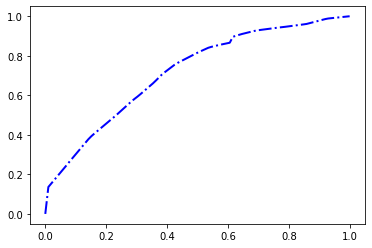

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,\
    confusion_matrix,\
    roc_auc_score,\
    average_precision_score,\
    f1_score,\
    matthews_corrcoef
from sklearn import metrics
import matplotlib
from sklearn.metrics import roc_curve, auc
from scipy import interp
    
Accuray = []
auROC = []
avePrecision = []
F1_Score = []
AUC = []
MCC = []
CM = np.array([
    [0, 0],
    [0, 0],
], dtype=int)

lw=2


mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in cv.split(X, y):

    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    #model = svm.SVC(gamma=0.001, C=100.,probability=True)
    #model = GaussianNB()
    model = KNeighborsClassifier(n_neighbors=7)
    
    model.fit(X_train, y_train)

    yHat= model.predict(X_test) # predicted labels

    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0

    Accuray.append(accuracy_score(y_pred=yHat, y_true=y_test))
    auROC.append(roc_auc_score(y_test, y_proba))
    avePrecision.append(average_precision_score(y_test, y_proba))  # auPR
    F1_Score.append(f1_score(y_true=y_test, y_pred=yHat))
    MCC.append(matthews_corrcoef(y_true=y_test, y_pred=yHat))

    CM += confusion_matrix(y_pred=yHat, y_true=y_test)

print('Accuracy: {:.4f} ({:0.2f}%)'.format(np.mean(Accuray), np.mean(Accuray)*100.0))
print('auROC: {0:.4f}'.format(np.mean(auROC)))
print('auPR: {0:.4f}'.format(np.mean(avePrecision))) # average_Precision
print('F1-score: {0:.4f}'.format(np.mean(F1_Score)))
print('MCC: {0:.4f}'.format(np.mean(MCC)))

print(CM)


mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

import matplotlib.pyplot as plt
from scipy import interp
plt.plot(mean_fpr, mean_tpr, color='b', linestyle='-.',
             label='Gaussian Naive bayes auROC= %0.2f' % mean_auc, lw=lw)